## Data Prep

In [1]:
ciaover -v

# packages in environment at /soft/miniconda3/envs/ciao:
#
# Name                    Version                   Build  Channel
ciao                      4.13.0           py38h5ec60c1_0    http://cxc.cfa.harvard.edu/conda/ciao
ciao-contrib              4.13.0                     py_4    http://cxc.cfa.harvard.edu/conda/ciao
ds9                       8.2                           2    http://cxc.cfa.harvard.edu/conda/ciao
sherpa                    4.13.0           py38h5ec60c1_0    http://cxc.cfa.harvard.edu/conda/ciao
zciao                     4.13.1                        3    https://hea-www.harvard.edu/~kjg/ciao

System information:
Linux kjg-FX6800-01e 5.4.0-62-generic #70-Ubuntu SMP Tue Jan 12 12:45:47 UTC 2021 x86_64 x86_64 x86_64 GNU/Linux


In [2]:
/bin/rm -rf 13510

download_chandra_obsid 13510 evt1,asol,bpix,bias,dtf,flt,fov,msk,mtl,pbk,stat


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt1     fits      138 Mb  ####################           58 s  2436.2 kb/s
  asol     fits       15 Mb  ####################            7 s  2280.7 kb/s
  mtl      fits        2 Mb  ####################          < 1 s  4109.2 kb/s
  stat     fits        2 Mb  ####################          < 1 s  5327.7 kb/s
  bias     fits      488 Kb  ####################          < 1 s  2024.4 kb/s
  bias     fits      452 Kb  ####################          < 1 s  1856.1 kb/s
  bias     fits      431 Kb  ####################          < 1 s  1746.5 kb/s
  bias     fits      426 Kb  ####################          < 1 s  1761.3 kb/s
  bias     fits      426 Kb  ####################          < 1 s  2005.1 kb/s
  bpix     fits       47 Kb  ####################          < 1 s  325.3 kb/s
  flt      fits        7 Kb  ####################          < 1 s

In [3]:
cd 13510

In [4]:
download_obsid_caldb ./secondary/acisf13510_001N002_evt1.fits.gz out=./CALDB clob+

download_obsid_caldb
          infile = ./secondary/acisf13510_001N002_evt1.fits.gz
          outdir = ./CALDB
      background = no
         missing = no
         clobber = yes
         verbose = 1
            mode = ql

Retrieving files for CALDB_VER = 4.9.4
Retrieving CALDB index files
Processing infile=./secondary/acisf13510_001N002_evt1.fits.gz
Retrieving CALDB data files
    Filename:                               0------------------1
    telD1999-07-23geomN0006.fits            ####################
    telD1999-07-23aimptsN0002.fits          ####################
    telD1999-07-23tdetN0001.fits            ####################
    telD1999-07-23skyN0002.fits             ####################
    telD1999-07-23sgeomN0001.fits           ####################
    hrmaD1996-12-20axeffaN0008.fits         ####################
    hrmaD1996-12-20vignetN0003.fits         ####################
    acisD1997-04-17qeN0006.fits             ####################
    acisD2010-02-01qeuN0007.fits   

In [5]:
source ./CALDB/software/tools/caldbinit.sh

In [6]:
chandra_repro . ./repro clob+


Running chandra_repro
version: 01 December 2020


Processing input directory '/home/kjg/Chandra/Abell1775/13510'

Applying boresight update to aspect solution file
Resetting afterglow status bits in evt1.fits file...

Running acis_build_badpix and acis_find_afterglow to create a new bad pixel file...

Running acis_process_events to reprocess the evt1.fits file...
Output from acis_process_events:
# acis_process_events (CIAO 4.13): WARNING: The ra_targ, dec_targ, or roll_nom specified by /home/kjg/Chandra/Abell1775/13510/repro/pcadf13510_repro_obs.par does not match the values in the event file- using the obs.par values.
# acis_process_events (CIAO 4.13): The following error occurred 6 times:
	dsAPEPULSEHEIGHTERR -- WARNING: pulse height is less than split threshold when performing serial CTI adjustment.
Filtering the evt1.fits file by grade and status and time...
Applying the good time intervals from the flt1.fits file...
The new evt2.fits file is: /home/kjg/Chandra/Abell1775/13510/rep

In [7]:
fluximage repro/acisf13510_repro_evt2.fits"[ccd_id=7]" bin=1 band=broad psfecf=0.9 out=fimg/abell1775

Running fluximage
Version: 01 April 2020

Using CSC ACIS broad science energy band.
Aspect solution repro/pcadf13510_repro_asol1.fits found.
Bad-pixel file repro/acisf13510_repro_bpix1.fits found.
Mask file repro/acisf13510_001N002_msk1.fits found.

The output images will have 1206 by 1202 pixels, pixel size of 0.492 arcsec,
    and cover x=3428.5:4634.5:1,y=3780.5:4982.5:1.

Running tasks in parallel with 8 processors.
Creating aspect histogram for obsid 13510
Creating instrument map for obsid 13510
Creating exposure map for obsid 13510
Thresholding data for obsid 13510
Exposure-correcting image for obsid 13510
Creating PSF map for obsid 13510

The following files were created:

 The clipped counts image is:
     fimg/abell1775_broad_thresh.img

 The clipped exposure map is:
     fimg/abell1775_broad_thresh.expmap

 The PSF map is:
     fimg/abell1775_broad_thresh.psfmap

 The exposure-corrected image is:
     fimg/abell1775_broad_flux.img



In [8]:
/bin/ls fimg/*

fimg/abell1775_broad_flux.img	    fimg/abell1775_broad_thresh.img
fimg/abell1775_broad_thresh.expmap  fimg/abell1775_broad_thresh.psfmap


In [9]:
# Grab a nice custom color map
curl -O http://soliton.vm.bytemark.co.uk/pub/cpt-city/neota/othr/sunset-in-atlantis.sao

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   673  100   673    0     0   1939      0 --:--:-- --:--:-- --:--:--  1945


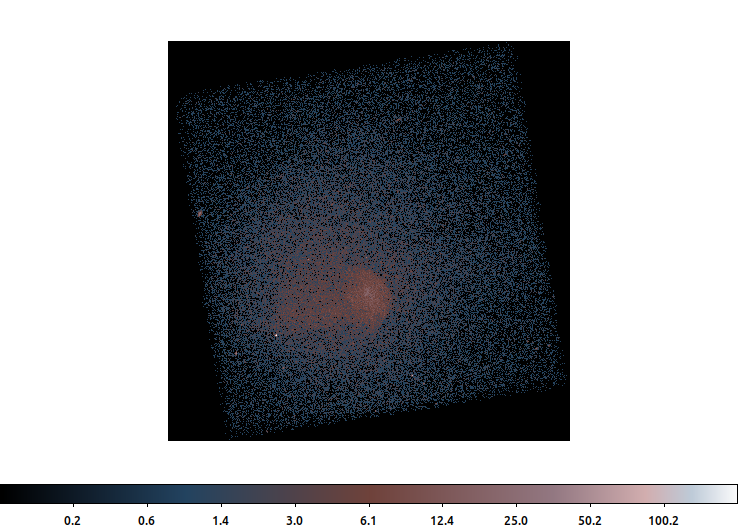

In [10]:
ds9 fimg/abell1775_broad_thresh.img \
  -cmap load sunset-in-atlantis.sao \
  -scale log -block to 3 \
  -saveimage png fimg/abell1775_broad_thresh.img.png -quit

display < fimg/abell1775_broad_thresh.img.png 

### Remove point sources

In [11]:
/bin/rm -rf points
mkdir points

punlearn celldetect
celldetect \
  infile=fimg/abell1775_broad_thresh.img \
  expstk=fimg/abell1775_broad_thresh.expmap \
  psffil=fimg/abell1775_broad_thresh.psfmap \
  outfile=points/cell.src thresh=2.7 mode=h clob+

In [12]:
### ds9 fimg/abell1775_broad_thresh.img -region points/cell.src 

In [13]:
/bin/rm -f points/points*reg
punlearn roi
roi \
  infile=points/cell.src \
  outsrc=points/points_%03d.reg \
  group=individual target=target \
  mode=h clob+ compute_conf=no 

In [14]:
# Create lists for source and background regions, could also use `splitroi`
/bin/ls points/*reg | sed "s@.*@region(&[srcreg])@" > points/src.lis
/bin/ls points/*reg | sed "s@.*@region(&[bkgreg])@" > points/bkg.lis

In [15]:
# Fill in the holes

punlearn dmfilth
dmfilth fimg/abell1775_broad_thresh.img \
  outfile=fimg/abell1775_broad_thresh.img.fill \
  method=POIS \
  src=@-points/src.lis \
  bkg=@-points/bkg.lis \
  randseed=1010 \
  mode=h clob+ 

In [16]:
### ds9 fimg/abell1775_broad_thresh.img.fill

### Crop image to remove corners w/o counts

In [17]:
punlearn skyfov
skyfov fimg/abell1775_broad_flux.img out=fimg/my.fov \
  msk=secondary/acisf13510_001N002_msk1.fits clob+\
  method=convex aspect=repro/pcadf13510_repro_asol1.fits
dmcopy fimg/my.fov"[ccd_id=7]" fimg/my7.fov clob+

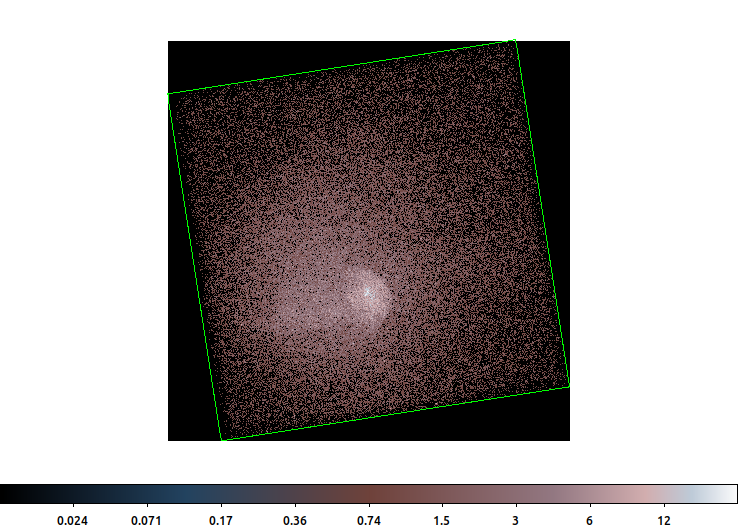

In [18]:
ds9 fimg/abell1775_broad_thresh.img.fill \
  -cmap load sunset-in-atlantis.sao \
  -scale log -block to 3 \
  -region fimg/my7.fov \
  -saveimage png fimg/abell1775_broad_thresh.img.fill.png -quit

display < fimg/abell1775_broad_thresh.img.fill.png 

In [19]:
# This is NOT a great algorithm for finding a box that inscribes a polygon
# but it works OK for this example.

python << EOM
from pycrates import read_file
tab = read_file("fimg/my7.fov")
xx = tab.get_column("x").values
yy = tab.get_column("y").values
npts=xx.shape[1]

xx = xx.reshape([npts])[0:npts-1]
yy = yy.reshape([npts])[0:npts-1]

mx = sum(xx)/(npts-1)
my = sum(yy)/(npts-1)

xx = xx - mx
yy = yy - my

xl = max(xx[xx<0])+mx
xh = min(xx[xx>0])+mx

yl = max(yy[yy<0])+my
yh = min(yy[yy>0])+my

print(f"[bin x={xl:.6}:{xh:.6}:1,y={yl:.6}:{yh:.6}:1]")

EOM


[bin x=3595.51:4460.01:1,y=3942.71:4800.01:1]


In [20]:
/bin/ls fimg/* | egrep -v 'png|crop|fov'  | \
  xargs -I@ dmcopy @"[bin x=3595.51:4460.01:1,y=3942.71:4800.01:1]" @_crop clob+

In [21]:
### ds9 fimg/abell1775_broad_thresh.img.fill_crop fimg/abell1775_broad_thresh.img.fill

In [22]:
dmcopy fimg/abell1775_broad_thresh.img.fill_crop img.fits clob+